In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from itertools import cycle

In [2]:
ticker = 'AAPL'
freq = '1d'

In [3]:
df = pd.read_csv(f'data/{ticker}/{freq}_raw.csv')
df.head()

,<TICKER>,<PER>,<DATE>,<TIME>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<VOL>,<OPENINT>
0,AAPL.US,D,19840907,0,0.100763,0.101999,0.099546,0.100763,9.767604e+07,0
1,AAPL.US,D,19840910,0,0.100763,0.101071,0.098340,0.100165,7.581254e+07,0
2,AAPL.US,D,19840911,0,0.101071,0.103814,0.101071,0.101999,1.787705e+08,0
3,AAPL.US,D,19840912,0,0.101999,0.102597,0.098928,0.098928,1.561713e+08,0
4,AAPL.US,D,19840913,0,0.104432,0.104730,0.104432,0.104432,2.432310e+08,0


In [4]:
df = pd.read_csv(f'data/{ticker}/{freq}_raw.csv')
df.columns = ['ticker', 'per', 'date', 'time', 'open', 'high', 'low', 'close', 'volume', 'openint']
df.drop(['ticker', 'per', 'openint'], axis=1, inplace=True)
df['time'] = df['time'].apply(lambda x: str(x).zfill(6))
datetimes = []
for i in range(len(df)):
    date = str(df['date'][i])
    time = str(df['time'][i])
    date_time = datetime.strptime(date + ' ' + time, '%Y%m%d %H%M%S').strftime('%Y-%m-%d %H:%M:%S')
    datetimes.append(date_time)
df['datetime'] = datetimes
df.drop(['date', 'time'], axis=1, inplace=True)
df.head()

,open,high,low,close,volume,datetime
0,0.100763,0.101999,0.099546,0.100763,9.767604e+07,1984-09-07 00:00:00
1,0.100763,0.101071,0.098340,0.100165,7.581254e+07,1984-09-10 00:00:00
2,0.101071,0.103814,0.101071,0.101999,1.787705e+08,1984-09-11 00:00:00
3,0.101999,0.102597,0.098928,0.098928,1.561713e+08,1984-09-12 00:00:00
4,0.104432,0.104730,0.104432,0.104432,2.432310e+08,1984-09-13 00:00:00


In [5]:
df = df[df['datetime'] >= '2010-01-01']
len(df)

3711

In [6]:
def return_bollinger_bands(data, window=20, num_std=2):
    means = data.rolling(window=window).mean()
    std = data.rolling(window=window).std()
    upper = means + num_std * std
    lower = means - num_std * std
    return upper, lower, means

def return_rsi(data, window=14):
    delta = data.diff()
    gain = delta.clip(lower=0)
    loss = -delta.clip(upper=0)
    avg_gain = gain.rolling(window=window, min_periods=1).mean()
    avg_loss = loss.rolling(window=window, min_periods=1).mean()
    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

def return_roc(data, periods = 14):
    return data.pct_change(periods=periods)

In [7]:
close = df['close']
upper, lower, means = return_bollinger_bands(close)
rsi = return_rsi(close)
roc = return_roc(close)
diff = close.diff()
perc_diff = close.pct_change() * 100
width = upper - lower
ema = close.ewm(span=10, adjust=False, min_periods=10).mean()
len(upper)

3711

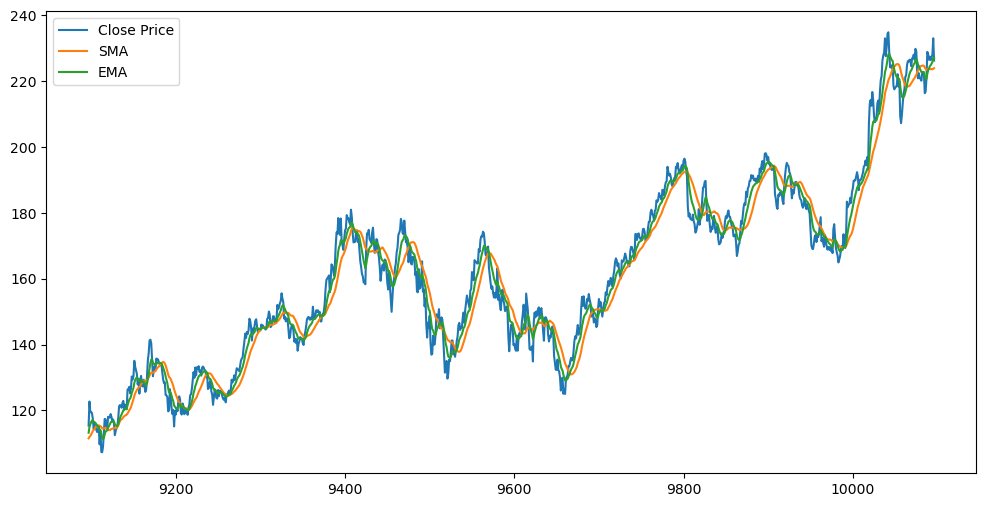

In [8]:
plt.figure(figsize=(12, 6))
plt.plot(close[-1000:], label='Close Price')
plt.plot(means[-1000:], label='SMA')
plt.plot(ema[-1000:], label='EMA')
plt.legend()
plt.show()

In [9]:
df['width'] = width
df['sma'] = means
df['ema'] = ema
df['rsi'] = rsi
df['roc'] = roc
df['diff'] = diff
df['perc_diff'] = perc_diff
df.head()

,open,high,low,close,volume,datetime,width,sma,ema,rsi,roc,diff,perc_diff
6386,6.49958,6.53008,6.46597,6.51522,5.764890e+08,2010-01-04 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6387,6.53905,6.56358,6.49230,6.52639,7.055130e+08,2010-01-05 00:00:00,NaN,NaN,NaN,100.000000,NaN,0.01117,0.171445
6388,6.52639,6.55241,6.41553,6.42221,6.452991e+08,2010-01-06 00:00:00,NaN,NaN,NaN,9.683572,NaN,-0.10418,-1.596288
6389,6.44444,6.45421,6.36409,6.41085,5.588893e+08,2010-01-07 00:00:00,NaN,NaN,NaN,8.815405,NaN,-0.01136,-0.176886
6390,6.40586,6.45421,6.36458,6.45401,5.246856e+08,2010-01-08 00:00:00,NaN,NaN,NaN,31.983281,NaN,0.04316,0.673234


In [10]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)
print(len(df))

3692


In [11]:
df.head()

,open,high,low,close,volume,datetime,width,sma,ema,rsi,roc,diff,perc_diff
6405,5.86301,5.96680,5.82384,5.92842,8.771742e+08,2010-02-01 00:00:00,0.796227,6.303707,6.140772,38.187350,-0.073205,0.08175,1.398232
6406,5.96451,5.97677,5.88704,5.96201,8.186530e+08,2010-02-02 00:00:00,0.825675,6.276047,6.108270,40.684413,-0.057242,0.03359,0.566593
6407,5.94437,6.09511,5.91874,6.06500,7.205451e+08,2010-02-03 00:00:00,0.810868,6.252977,6.100402,41.122589,-0.054197,0.10299,1.727438
6408,5.99312,6.03958,5.83250,5.84647,8.869241e+08,2010-02-04 00:00:00,0.870970,6.224190,6.054233,37.635942,-0.082957,-0.21853,-3.603133
6409,5.86581,5.96680,5.81028,5.95035,9.965172e+08,2010-02-05 00:00:00,0.885137,6.201165,6.035345,42.548420,-0.050781,0.10388,1.776799


In [12]:
df.to_csv(f'data/{ticker}/{freq}_features.csv', index=False)